In [1]:
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from implementations import *
from annexe import *

In [2]:
train_set = load_csv_data('/Users/bedanian/Desktop/Machine Learning/Project 1/train.csv', sub_sample = True)
test_set = load_csv_data('/Users/bedanian/Desktop/Machine Learning/Project 1/test.csv', sub_sample = False)

In [13]:
def cross_validation(train_set,lower,upper,degree):
    x_train = train_set[1]
    y_train = train_set[0]
    #pre process
    na_indices = get_na_columns(x_train, 0.7, -999)
    x_train = np.delete(x_train, na_indices, axis = 1)
    x_train[x_train == -999] = 0
    #split dataset
    (x_train, x_test, y_train, y_test) = split_data(x_train, y_train, ratio = 0.8, seed = 1)
    #standardize 
    x_train, x_test = standardize(x_train, x_test)
    #Polynome 
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    lambda_list = np.logspace(lower, upper, 300)
    rmse_train = []
    rmse_test = []
    for lbd in lambda_list:
        w = ridge_regression(y_train, x_train, lbd)[0]
        loss_train = 2*MSE(y_train, x_train, w)
        loss_test = 2*MSE(y_test, x_test, w)
        rmse_train.append(np.sqrt(loss_train))
        rmse_test.append(np.sqrt(loss_test))
    visualization(lambda_list, rmse_train, rmse_test,d)
    return [min(rmse_test),lambda_list[np.argmin(rmse_test)]]

def submit(train_set,test_set,lbd,degree):
    #train set test set and id
    x_train = train_set[1]
    y_train = train_set[0]
    ids_train = train_set[2]
    x_test = test_set[1]
    y_test = test_set[0]
    ids_test = test_set[2]
    #drop columns with 70% of NA 
    na_indices = get_na_columns(x_train, 0.7, -999)
    x_train = np.delete(x_train, na_indices, axis = 1)
    x_test = np.delete(x_test, na_indices, axis = 1)
    # put 0 for -999
    x_train[x_train == -999] = 0
    x_test[x_test == -999] = 0
    #standardize 
    x_train, x_test = standardize(x_train, x_test)
    #apply polynome of degree 3 on it
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    #ridge regression with lbd 10**-11 need to be explain why 
    (w,loss) = ridge_regression(y_train, x_train, lbd)
    #use sigmoid to put the value between 1 and 0 
    # if 0 put -1
    y = zero_to_neg(np.around(sigmoid(x_test @ w)))
    #submit
    create_csv_submission(ids_test, y, 'prediction.csv')

[[0.7864775452527495, 3.40229976567805e-11, 2], [0.777295808485898, 1e-50, 3], [0.7786105202064657, 3.1019785901381125e-23, 4], [0.7685425804869963, 4.7378933909631635e-28, 5], [0.7714689972050776, 8.060361408861362e-19, 6], [0.771508272212392, 8.060361408861362e-19, 7], [0.7715084500391217, 8.060361408861362e-19, 8], [0.7715084498732342, 8.060361408861362e-19, 9]]
[0.7685425804869963, 4.7378933909631635e-28, 5]


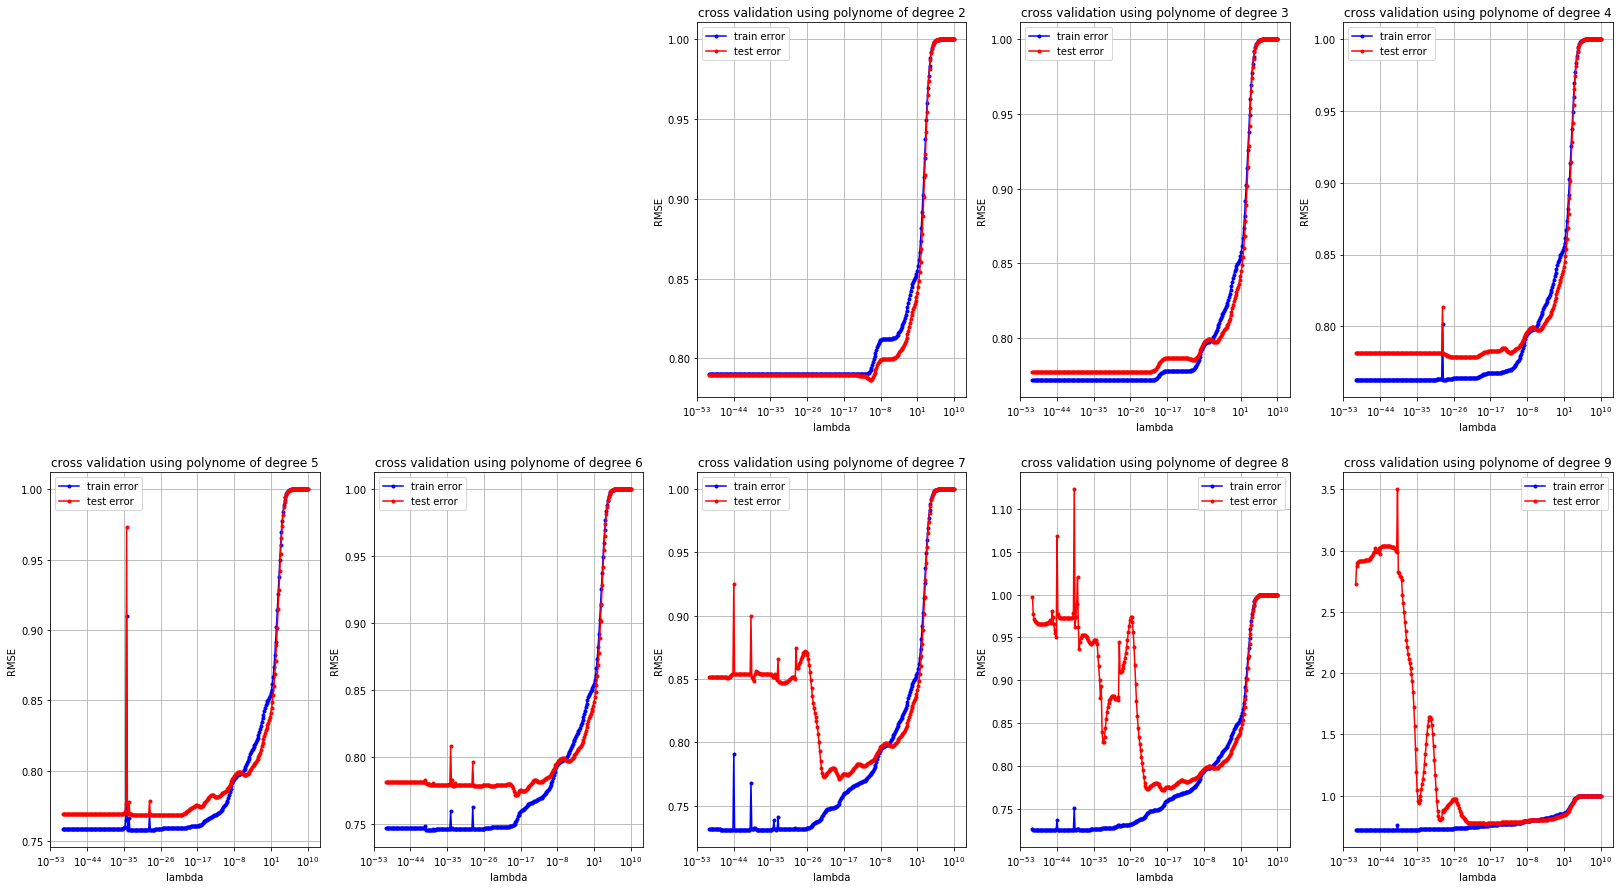

In [14]:
res = []
for d in range(2,10):
    res += [cross_validation(train_set,-50,10,d)+[d]]
print(res)
print(res[np.argmin([row[0] for row in res])])

In [15]:
# best one = (5.298316906283724e-49, 12)
submit(train_set,test_set,4.7378933909631635e-28, 5)

In [23]:
def cross_validation(train_set,lower,upper,d):
    x_train = train_set[1]
    y_train = train_set[0]
    #pre process
    na_indices = get_na_columns(x_train, 0.7, -999)
    x_train = np.delete(x_train, na_indices, axis = 1)
    x_train[x_train == -999] = 0
    #split dataset
    (x_train, x_test, y_train, y_test) = split_data(x_train, y_train, ratio = 0.8, seed = 1)
    #standardize 
    x_train, x_test = standardize(x_train, x_test)
    #Polynome 
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    #wo 
    w0 = least_squares(y_train, x_train)[0]
    lbd = 1.084365968689610 
    gamm = 4.824108704165374e-0
    lambda_list = np.logspace(lower, upper,200)
    rmse_train = []
    rmse_test = []
    for gamma in lambda_list:
        w = reg_logistic_regression(y_train, x_train, lbd, w0, 1000, gamma)[0]
        loss_train = 2*MSE(y_train, x_train, w)
        loss_test = 2*MSE(y_test, x_test, w)
        rmse_train.append(np.sqrt(loss_train))
        rmse_test.append(np.sqrt(loss_test))
    visualization(lambda_list, rmse_train, rmse_test,d)
    return [min(rmse_train),min(rmse_test),lambda_list[np.argmin(rmse_test)]]

[0.7718365167962474, 0.7767000501337182, 4.824108704165374e-05]

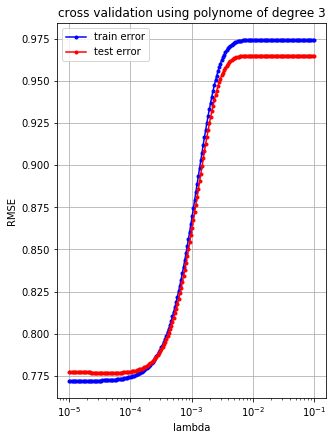

In [25]:
d = 3
cross_validation(train_set,-5,-1,d)

[0.5956896500450447, 0.6040663949465689, 7.742636826811246]
0.5956961100056294
0.6041885924271255


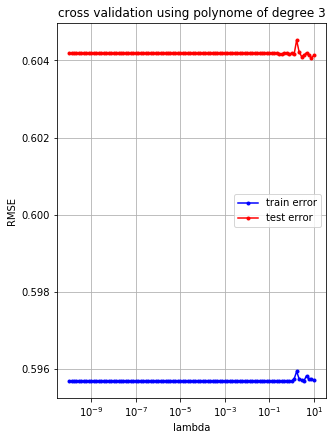

In [11]:
degree = 3
lbd = 1.084365968689610 
gamm = 4.824108704165374e-0
x_train = train_set[1]
y_train = train_set[0]
#pre process
na_indices = get_na_columns(x_train, 0.7, -999)
x_train = np.delete(x_train, na_indices, axis = 1)
x_train[x_train == -999] = 0
#split dataset
(x_train, x_test, y_train, y_test) = split_data(x_train, y_train, ratio = 0.8, seed = 1)
#standardize 
x_train, x_test = standardize(x_train, x_test)
#Polynome 
x_train = build_poly(x_train, degree)
x_test = build_poly(x_test, degree)
gamma_list = np.logspace(-10,2,100)
rmse_train = []
rmse_test = []
w0 = least_squares(y_train, x_train)[0]
for gamma in gamma_list:
    w = least_squares_SGD(y_train, x_train, w0, 1000, gamma)[0]
    loss_train = 2*MSE(y_train, x_train, w)
    loss_test = 2*MSE(y_test, x_test, w)
    rmse_train.append(loss_train)
    rmse_test.append(loss_test)
visualization(gamma_list, rmse_train, rmse_test,3)
print([min(rmse_train),min(rmse_test),gamma_list[np.argmin(rmse_test)]])
print(np.mean(rmse_train))
print(np.mean(rmse_test))

In [ ]:
lambda_list = np.logspace(lower, 0, upper)
rmse_train = []
rmse_test = []
for lbd in lambda_list:
    w = ridge_regression(y_train, x_train, lbd)[0]
    loss_train = 2*MSE(y_train, x_train, w)
    loss_test = 2*MSE(y_test, x_test, w)
    rmse_train.append(np.sqrt(loss_train))
    rmse_test.append(np.sqrt(loss_test))
visualization(lambda_list, rmse_train, rmse_test,d)
    return [min(rmse_train),min(rmse_test),lambda_list[np.argmin(rmse_test)]]

In [4]:
degree = 3
lbd = 1.084365968689610 
gamma = 4.824108704165374e-5
#train set test set and id
x_train = train_set[1]
y_train = train_set[0]
ids_train = train_set[2]
x_test = test_set[1]
y_test = test_set[0]
ids_test = test_set[2]
#drop columns with 70% of NA 
na_indices = get_na_columns(x_train, 0.7, -999)
x_train = np.delete(x_train, na_indices, axis = 1)
x_test = np.delete(x_test, na_indices, axis = 1)
# put 0 for -999
x_train[x_train == -999] = 0
x_test[x_test == -999] = 0
#standardize 
x_train, x_test = standardize(x_train, x_test)
#apply polynome of degree 3 on it
x_train = build_poly(x_train, degree)
x_test = build_poly(x_test, degree)
#ridge regression with lbd 10**-11 need to be explain why 
w0 = least_squares(y_train, x_train)[0]
(w,loss) = reg_logistic_regression(y_train, x_train, lbd, w0, 1000, gamma)
#use sigmoid to put the value between 1 and 0 
# if 0 put -1
y = zero_to_neg(np.around(sigmoid(x_test @ w)))
#submit
create_csv_submission(ids_test, y, 'prediction.csv')

In [29]:
w

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])